# Logistic regression with the admission.csv dataset

* gre - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
Score ranges from 200 to 800.
* gpa - college grade point average.
Continuous between 0.0 and 4.0.
* admit - binary value
Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

admissions = pd.read_csv("data/admissions.csv")

plt.scatter(admissions['gpa'],admissions['admit'])
plt.show()

In [2]:
# Univariate logistic regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']],admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

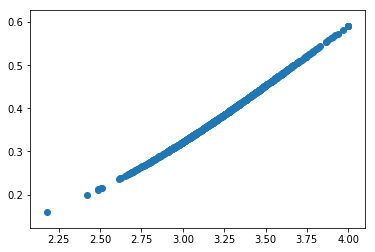

In [3]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'],pred_probs[:,1])
plt.show()

In [4]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels = logistic_model.predict(admissions[["gpa"]])
print(fitted_labels[:10])

[0 0 0 0 0 0 0 0 0 1]


In [5]:
# Mission 2: introduction to evaluating binary classifiers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("data/admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
admissions["predicted_label"] = model.predict(admissions[['gpa']])

In [11]:
admissions.rename(columns={"admit":"actual_label"},inplace=True)
admissions['matches'] = admissions['actual_label'] == admissions['predicted_label']
correct_predictions = admissions[admissions['matches'] == True]
print(correct_predictions.head(5))
accuracy = correct_predictions.shape[0]/admissions.shape[0]
print(accuracy)

   actual_label       gpa         gre  predicted_label  matches
0             0  3.177277  594.102992                0     True
1             0  3.412655  631.528607                0     True
2             0  2.728097  553.714399                0     True
3             0  3.093559  551.089985                0     True
4             0  3.141923  537.184894                0     True
0.6459627329192547


In [15]:
true_positives = admissions[admissions["predicted_label"] == 1][admissions["actual_label"] == 1].shape[0]

true_negatives = admissions[admissions["predicted_label"] == 0][admissions["actual_label"] == 0].shape[0]

print(true_positives,true_negatives)

31 385


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Calculating sensitivity
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = (admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)
false_negatives = admissions[false_negative_filter].shape[0]

sensitivity = true_positives/(true_positives+false_negatives)
print(sensitivity)

0.12704918032786885


In [22]:
# From previous screens
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positives = admissions[admissions["predicted_label"] == 1][admissions["actual_label"]==0].shape[0]

specificity = true_negatives/(true_negatives+false_positives)
print(specificity)

0.9625


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
